In [1]:
%load_ext autoreload
%autoreload 2

Saving results in /home/rgura001/clfutils4r/src/clfutils4r/results
                    precision    recall  f1-score    support
malignant(class 0)   0.967742  0.952381  0.960000   63.00000
benign(class 1)      0.972477  0.981481  0.976959  108.00000
accuracy             0.970760  0.970760  0.970760    0.97076
macro avg            0.970109  0.966931  0.968479  171.00000
weighted avg         0.970733  0.970760  0.970711  171.00000


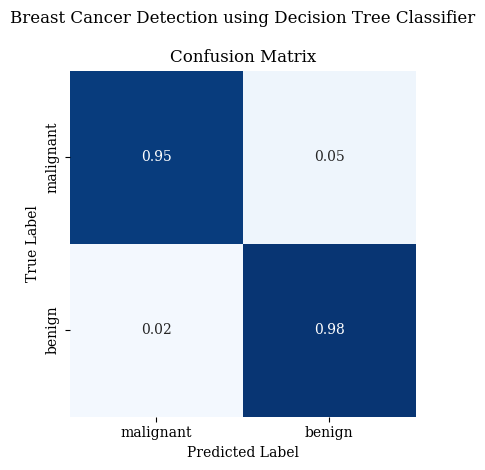

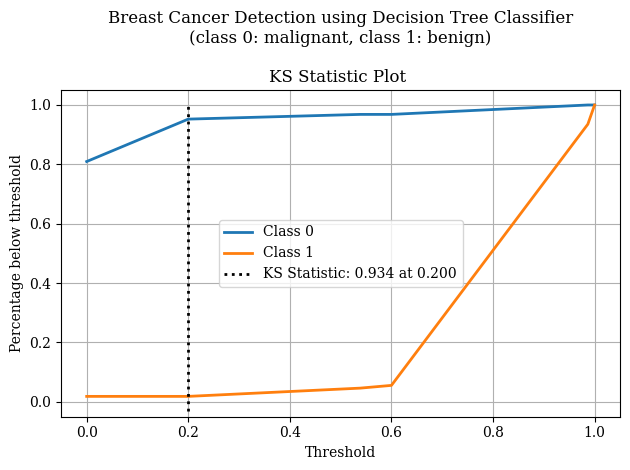

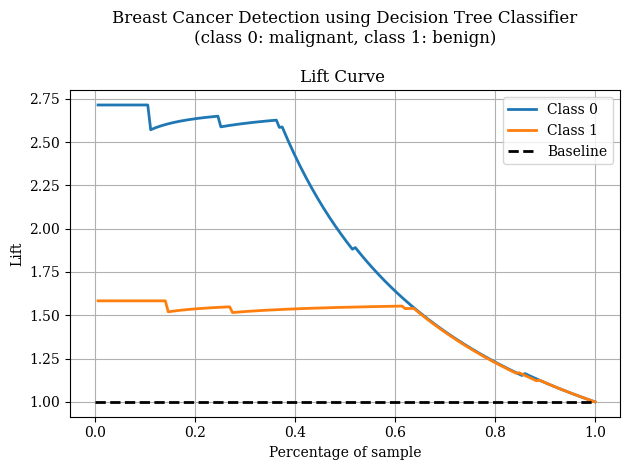

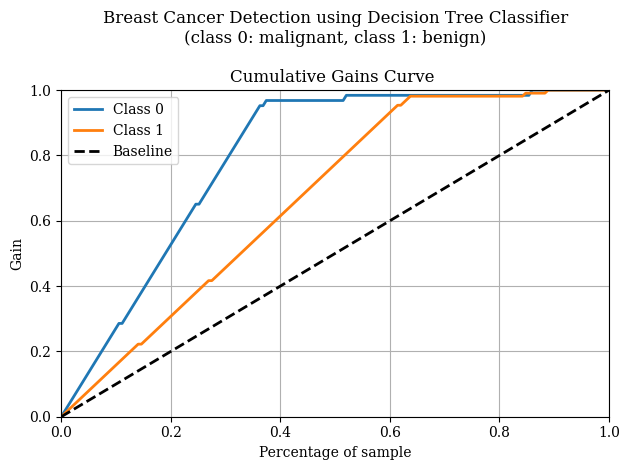

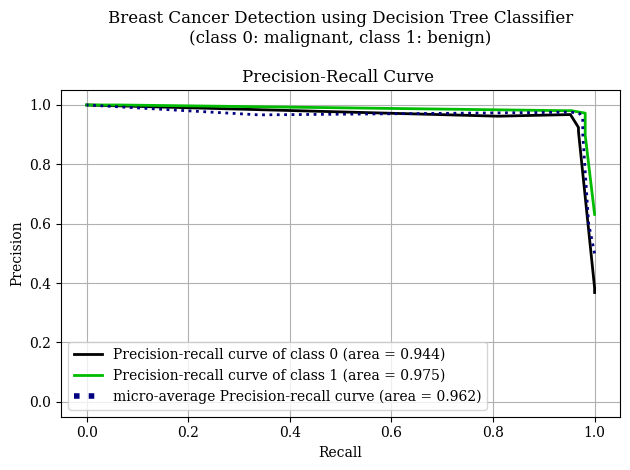

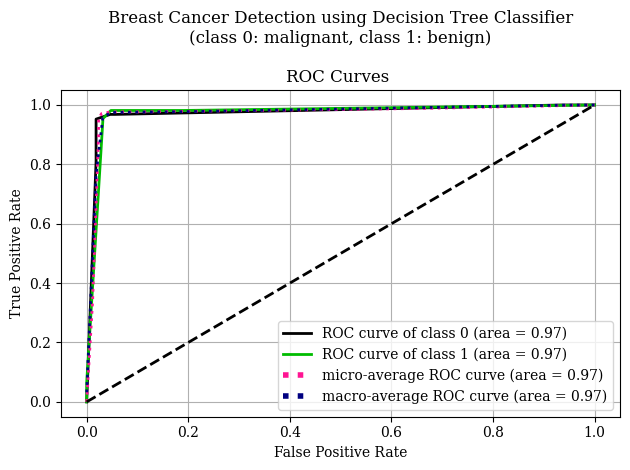

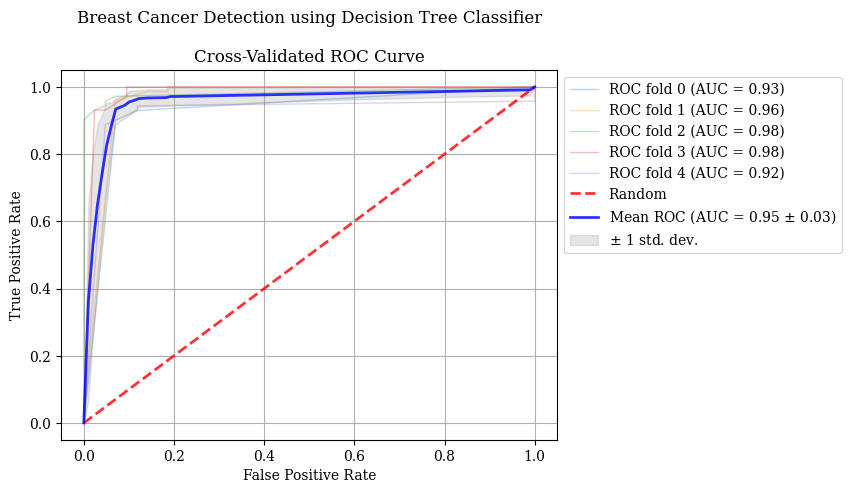

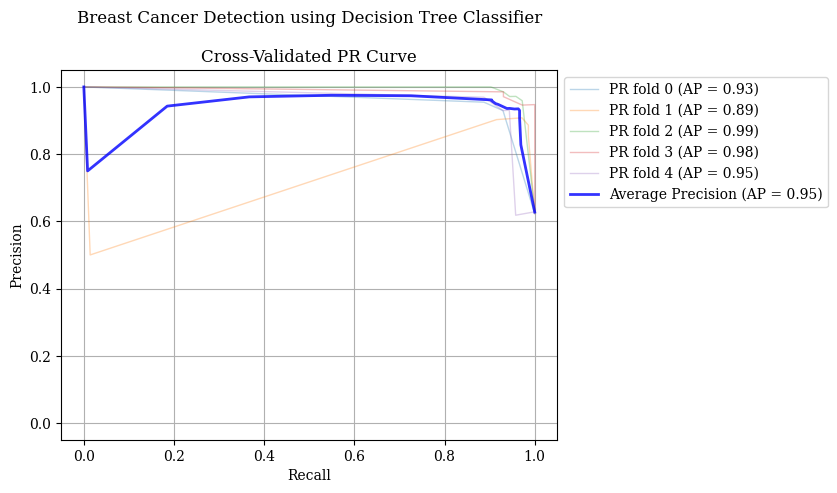

No. of samples used to build explainer and generate shap values:  50


  0%|          | 0/171 [00:00<?, ?it/s]

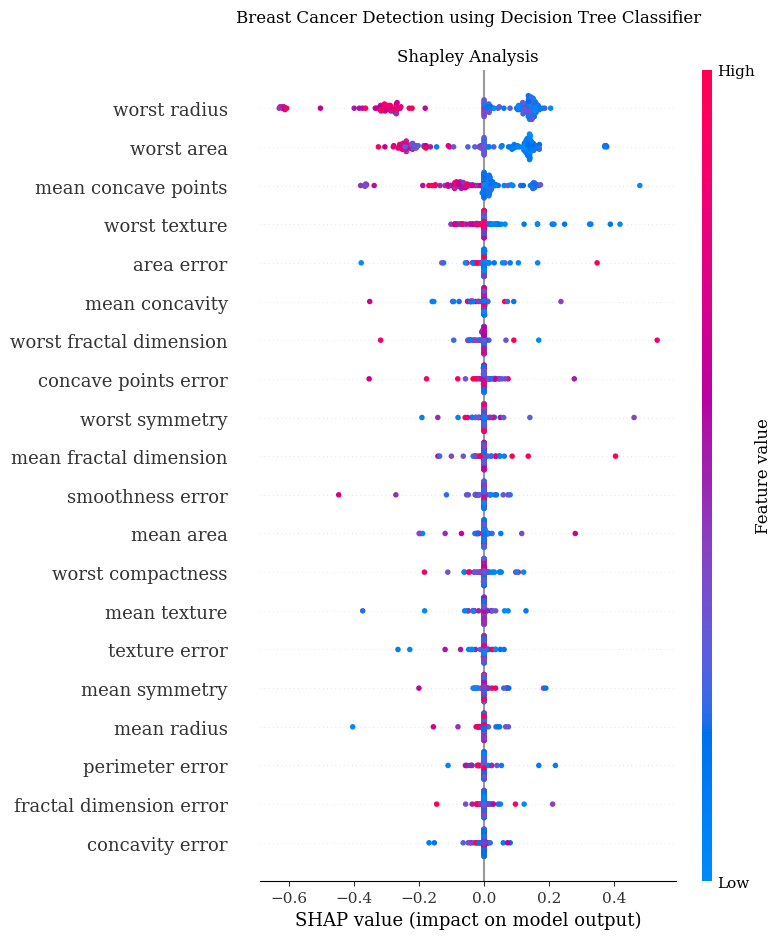

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Load dataset: Example - breast cancer prediction
data = datasets.load_breast_cancer()
class_names = data.target_names
feature_names = data.feature_names
X = pd.DataFrame(data.data, columns=feature_names)
y = pd.Series(data.target)
for feat_name in feature_names:
    X[feat_name] = scaler.fit_transform(X[[feat_name]]) 

## Pulsar start predition dataset
# dataset = pd.read_csv("pulsar_stars.csv")
# cols = [col for col in list(dataset.columns) if 'target_class' not in col]
# for feature in cols:
#     dataset[feature] = scaler.fit_transform(dataset[[feature]]) 
# X = dataset.drop(['target_class'], axis=1)
# y = dataset['target_class']
# class_names = ['not_pulsar', 'pulsar']

## Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Setup model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_params = {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
model.set_params(**model_params)

## Train model
model.fit(X_train, y_train)

## Evaluate model
from eval_classification import eval_classification
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

eval_classification(untrained_model=DecisionTreeClassifier().set_params(**model_params), 
                    n_splits=5, class_names=class_names, 
                    X=X, y=y,
                    make_shap_plot=True, trained_model=model, X_train=X_train, X_test=X_test,
                    y_test=y_test, y_pred=y_pred, y_pred_proba=y_pred_proba, 
                    titlestr="Breast Cancer Detection using Decision Tree Classifier",
                    show=True, save=True, RESULTS_DIR=os.getcwd()+'/results')